In [1]:
%matplotlib inline
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

--Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly

--Используйте также описательные статистики

--У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
display(df.head())
df.info()

age gender city_type  full_mob  ml_balance  cl_balance_0m  loan_balance_0m  \
0   71    NaN      <100       103         0.0            0.0              0.0   
1   49    NaN      Mega        81         0.0            0.0              0.0   
2   56    NaN      Mega        81         0.0            0.0              0.0   
3   47    NaN      Mega        81         0.0            0.0              0.0   
4   74    NaN      Mega        81         0.0            0.0              0.0   

   td_balance_0m  casa_balance_0m  dc_trx_cnt  ...  min_loan_balance_1q  \
0            0.0           0.0000           0  ...                  0.0   
1            0.0        3272.9367           0  ...                  0.0   
2            0.0        6249.7550           6  ...                  0.0   
3            0.0       14354.9370           0  ...                  0.0   
4            0.0       91511.7691           0  ...                  0.0   

   max_loan_balance_1q  avg_loan_balance_1Y  min_cl_balance_1q  \
0                  0.0                  0.0                0.0   
1                  0.0                  0.0                0.0   
2                  0.0                  0.0                0.0   
3                  0.0                  0.0                0.0   
4                  0.0                  0.0                0.0   

   max_cl_balance_1q  avg_cl_balance_1Y  loan_to_deposit  Avg_trx  \
0                0.0                0.0              NaN      NaN   
1                0.0                0.0              NaN      NaN   
2                0.0                0.0              NaN   854.67   
3                0.0                0.0              NaN      NaN   
4                0.0                0.0              NaN      NaN   

   avgtrx_to_balance          nbi  
0                NaN          NaN  
1                NaN    28.762952  
2           0.083467  1973.335539  
3                NaN   364.008556  
4                NaN  6651.416562  

[5 rows x 28 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [3]:
df.isna().sum()

age                        0
gender                   723
city_type                  0
full_mob                   0
ml_balance                 0
cl_balance_0m              0
loan_balance_0m            0
td_balance_0m              0
casa_balance_0m            0
dc_trx_cnt                 0
dc_trx_sum                 0
income                     0
min_casa_balance_1q        0
max_casa_balance_1q        0
avg_casa_balance_1Y        0
min_td_balance_1q          0
max_td_balance_1q          0
avg_td_balance_1Y          0
min_loan_balance_1q        0
max_loan_balance_1q        0
avg_loan_balance_1Y        0
min_cl_balance_1q          0
max_cl_balance_1q          0
avg_cl_balance_1Y          0
loan_to_deposit        46180
Avg_trx                17872
avgtrx_to_balance      18485
nbi                     2431
dtype: int64

In [4]:
#Рассчитаем доли null-значений в заданных параметрах
print(f'gender - {1 - (df.gender.describe()[0]/ df.shape[0])}')
print(f'loan_to_deposit - {1 - (df.loan_to_deposit.describe()[0]/ df.shape[0])}')
print(f'Avg_trx - {1 - (df.Avg_trx.describe()[0]/ df.shape[0])}')
print(f'avgtrx_to_balance - {1 - (df.avgtrx_to_balance.describe()[0]/ df.shape[0])}')
print(f'nbi - {1 - (df.nbi.describe()[0]/ df.shape[0])}')


gender - 0.014460000000000028
loan_to_deposit - 0.9236
Avg_trx - 0.35744
avgtrx_to_balance - 0.36970000000000003
nbi - 0.04862


Делаем вывод, что удаление наблюдений с отсутствующими показателями пола (gender) не приведет к искажению информации. 

Данные полей с показателями loan_to_deposit, Avg_trx, avgtrx_to_balance отсутствуют более чем в 35% - использовать 
данные показатели при анализе не будем.

Заполним отсутствующие данные nbi медианным значением

In [5]:
#удалим строки с неизвестным значением пола
df.dropna(subset = ['gender'], inplace = True)
#заполним отсутствующие данные nbi медианным значением
df.nbi.fillna(value = df.nbi.median(), inplace = True)

In [6]:
df.describe()

age      full_mob    ml_balance  cl_balance_0m  \
count  49277.000000  49277.000000  4.927700e+04   4.927700e+04   
mean      41.619356     54.053209  1.301377e+04   6.072323e+04   
std       12.844941     47.493367  1.886467e+05   1.993169e+05   
min        4.000000      0.000000  0.000000e+00   0.000000e+00   
25%       32.000000     14.000000  0.000000e+00   0.000000e+00   
50%       40.000000     38.000000  0.000000e+00   0.000000e+00   
75%       51.000000     81.000000  0.000000e+00   0.000000e+00   
max       98.000000    236.000000  1.467568e+07   3.421262e+06   

       loan_balance_0m  td_balance_0m  casa_balance_0m    dc_trx_cnt  \
count     4.927700e+04   4.927700e+04     4.927700e+04  49277.000000   
mean      8.184205e+04   7.018214e+04     6.748250e+04    105.144185   
std       2.849633e+05   1.689763e+06     1.759309e+06    192.284390   
min       0.000000e+00   0.000000e+00     0.000000e+00      0.000000   
25%       0.000000e+00   0.000000e+00     3.308000e+01      0.000000   
50%       0.000000e+00   0.000000e+00     7.464000e+02     14.000000   
75%       0.000000e+00   0.000000e+00     8.611900e+03    123.000000   
max       1.467568e+07   3.305000e+08     2.474474e+08   2970.000000   

         dc_trx_sum        income  ...  min_loan_balance_1q  \
count  4.927700e+04  4.927700e+04  ...         4.927700e+04   
mean   2.190085e+05  2.549114e+04  ...         7.589488e+04   
std    5.895788e+05  4.385361e+05  ...         2.754938e+05   
min    0.000000e+00  0.000000e+00  ...         0.000000e+00   
25%    0.000000e+00  0.000000e+00  ...         0.000000e+00   
50%    3.400000e+04  0.000000e+00  ...         0.000000e+00   
75%    2.608150e+05  3.151271e+04  ...         0.000000e+00   
max    3.634105e+07  9.060000e+07  ...         1.467568e+07   

       max_loan_balance_1q  avg_loan_balance_1Y  min_cl_balance_1q  \
count         4.927700e+04         4.927700e+04       4.927700e+04   
mean          8.939249e+04         7.957675e+04       5.593123e+04   
std           2.994162e+05         2.755304e+05       1.881950e+05   
min           0.000000e+00         0.000000e+00       0.000000e+00   
25%           0.000000e+00         0.000000e+00       0.000000e+00   
50%           0.000000e+00         0.000000e+00       0.000000e+00   
75%           0.000000e+00         5.278846e+03       0.000000e+00   
max           1.481199e+07         1.502391e+07       3.421262e+06   

       max_cl_balance_1q  avg_cl_balance_1Y  loan_to_deposit       Avg_trx  \
count       4.927700e+04       4.927700e+04      3791.000000  3.155700e+04   
mean        6.553031e+04       5.579960e+04        18.376063  5.184263e+03   
std         2.089195e+05       1.724311e+05       270.352710  1.581875e+04   
min         0.000000e+00       0.000000e+00         0.000000  0.000000e+00   
25%         0.000000e+00       0.000000e+00         0.000000  8.102005e+02   
50%         0.000000e+00       0.000000e+00         0.000000  1.701549e+03   
75%         0.000000e+00       0.000000e+00         0.000000  4.361875e+03   
max         3.684066e+06       4.112823e+06     12521.279170  1.749500e+06   

       avgtrx_to_balance           nbi  
count       3.094800e+04  4.927700e+04  
mean        3.351975e+02  1.154597e+04  
std         2.959425e+04  4.441492e+04  
min         0.000000e+00  1.684957e-04  
25%         8.003262e-02  2.982251e+02  
50%         2.987259e-01  1.390088e+03  
75%         1.508440e+00  8.910718e+03  
max         5.000000e+06  4.691796e+06  

[8 rows x 26 columns]

В данном датасете приведена информация о взаимоотношениях с банком клиентов в возрасте от 4 до 98 лет. Средний возраст клиентов - 40 лет.

Касательно длительности взаимоотношений клиентов с банком, в среднем она составляет 38 месяцев.

Средний доход от клиентов без OPEX - 1390.09, максимальный - 189387.4.

In [7]:
#Избавимся от выбросов по анализируемым показателям
def drop_outliers (x, q1 = 0.0025, q2 = 0.9975):
    lower_bound = x.quantile(q1)
    upper_bound = x.quantile(q2)
    return df[(x > lower_bound) & (x < upper_bound)]

In [8]:
df = drop_outliers(df.nbi)
df = drop_outliers(df.dc_trx_sum)
df = drop_outliers(df.dc_trx_cnt)
df = drop_outliers(df.income)

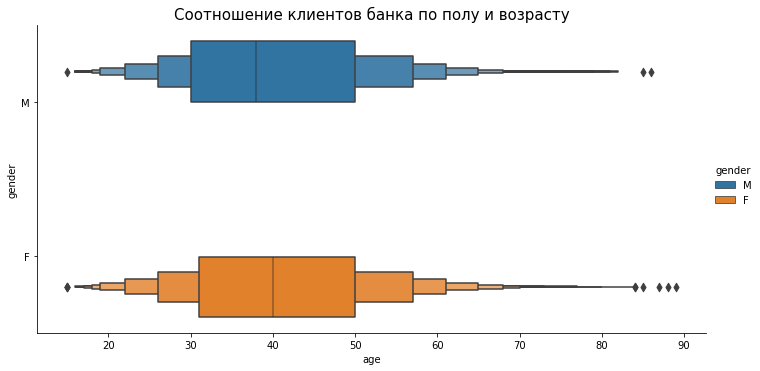

In [9]:
sns.catplot(
    x = 'age',
    y = 'gender',
    data = df,
    kind ='boxen',
    hue ='gender',
    height=5, 
    aspect=2)

plt.title("Соотношение клиентов банка по полу и возрасту",
          size=15);

Средний возраст мужчин-клиентов банка - 38 лет, женщин-клиентов - 40 лет

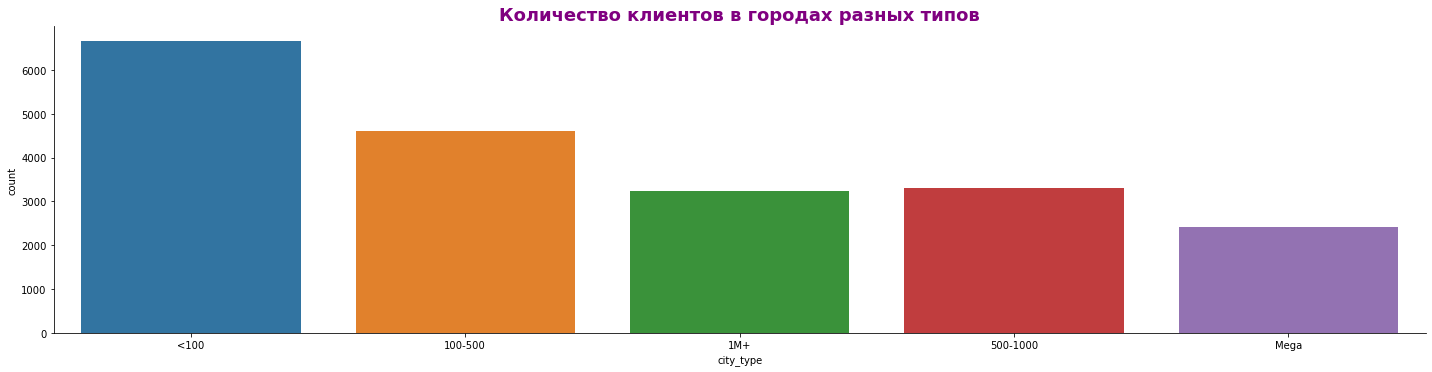

In [10]:
sns.catplot(
    data = df, kind = 'count',
    x = 'city_type',
    height=5, 
    aspect=4
)
plt.title('Количество клиентов в городах разных типов', size=18, color='purple', weight='bold');

Большее число клиентов банка сфокусировано в малых городах с численностью менее 100 тыс. человек. 

Cледующий по численности тип городов - с численностью 100-500 тыс.человек. 

Меньше всего клиентов из городов типа Mega.

In [11]:
fig = px.bar(df, x = 'income', y = 'city_type', 
             barmode ="group", color = 'age',
             facet_row="gender", 
             title = 'Доход клиентов в связке с типом городов, полом, возрастом клиентов')
fig.show()

Более высокий уровень дохода у клиентов в городах типов <100, 100-500.

Доходы мужчин выше доходов женщин, особенно явно это явление наблюдается в малых городах. 
Только в городах типов 1М+ и 100-500 доходы клиентов-женщин немногим выше таковых у мужчин.

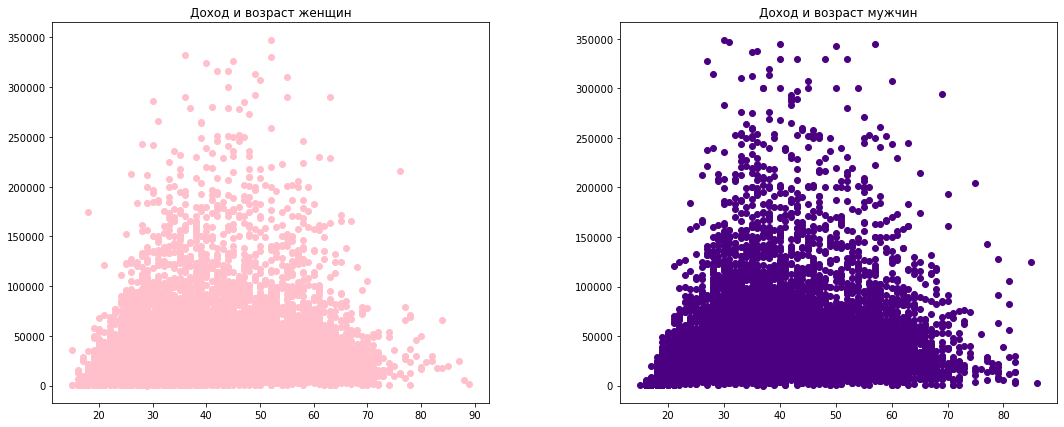

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.scatter(df.age[df.gender == 'F'], df.income[df.gender == 'F'], color = 'pink')
ax1.set_title('Доход и возраст женщин')
ax2.scatter(df.age[df.gender == 'М'], df.income[df.gender == 'М'], color = 'indigo')
ax2.set_title('Доход и возраст мужчин')

fig.set_size_inches(18,7)
plt.subplots_adjust(wspace=0.3)
plt.show()

Небольшое количество клиентов-женщин достигло максимальной отметки уровня дохода в 350000, возраст близок к 60.

У клиентов-мужчин эта отметка достигается чаще и характерна для возраста от 30 до 65 лет.

В целом мужчины получают высокую зарплату с более раннего возраста по сравнению с женщинами.

Уровень дохода большинства женщин сфокусирован в интервале 50000-100000, мужчин - 50000-150000

In [13]:
fig = px.sunburst(df.sort_values(by='age'), path = ['gender', 'age'], values = 'age', color = 'income',
                 title = 'Клиенты банка: пол, возраст, доход')
fig.show()

В датасете количество клиентов-женщин выше количества клиентов-мужчин. В целом у мужчин уровень дохода выше.

Возраст с наиболее высоким доходом для женщин: 38-52, для мужчин: 35-52.


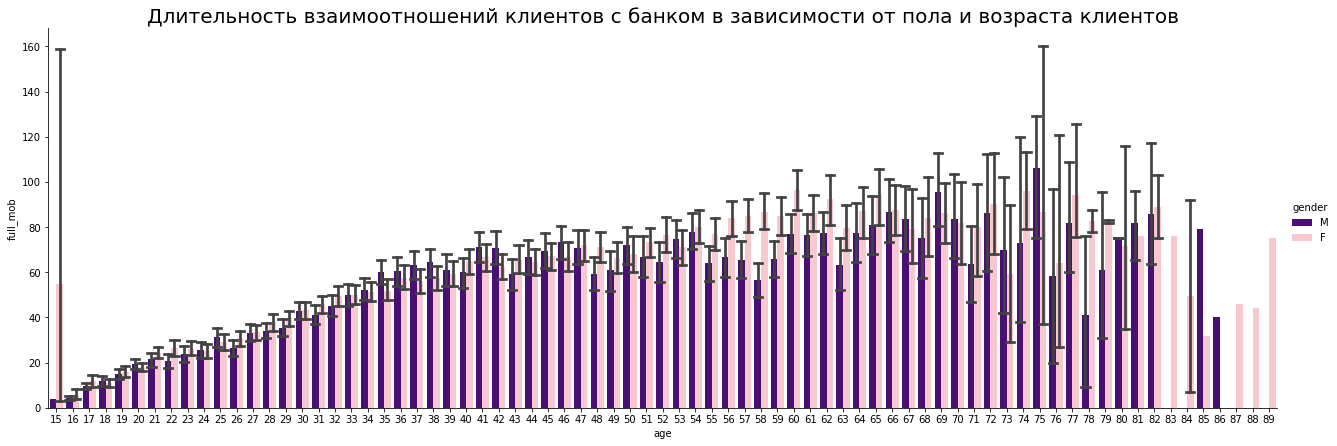

In [14]:
sns.catplot(
    x = 'age', 
    y = 'full_mob', 
    data = df[df.full_mob > 0], 
    kind ='bar', 
    hue = 'gender', 
    palette={"М": "indigo", "F": "pink"},
    capsize=0.5,
    height=6, 
    aspect=3
); 

plt.title('Длительность взаимоотношений клиентов с банком в зависимости от пола и возраста клиентов',
          size=20);

Обратим внимание на аномальные показатели: длительность отношений с банком для женщин в возрасте 15 и 75 лет достигает 160 месяцев.

В целом длительность взаимоотношений с банком увеличивается с возрастом клиентов в одинаковой пропорции для мужчин и женщин. При достижении 82-летнего возраста и выше банковскими услугами пользуются в основном женщины. Это может быть связано в том числе с более высокой длительностью жизни женщин

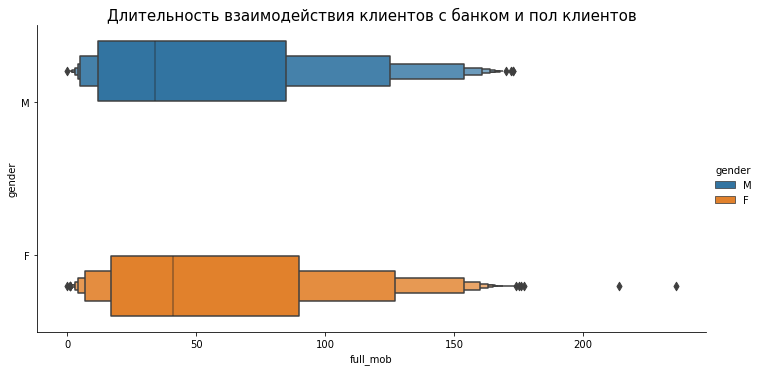

In [15]:
#Убедимся, что для клиентов обоих полов длительность взаимодействия с банком равномерна
sns.catplot(
    x = 'full_mob',
    y = 'gender',
    data = df,
    kind ='boxen',
    hue ='gender',
    height=5, 
    aspect=2)

plt.title('Длительность взаимодействия клиентов с банком и пол клиентов',
          size=15);

Делаем вывод, что длительность взаимоотношений с банком от пола клиентов не зависит

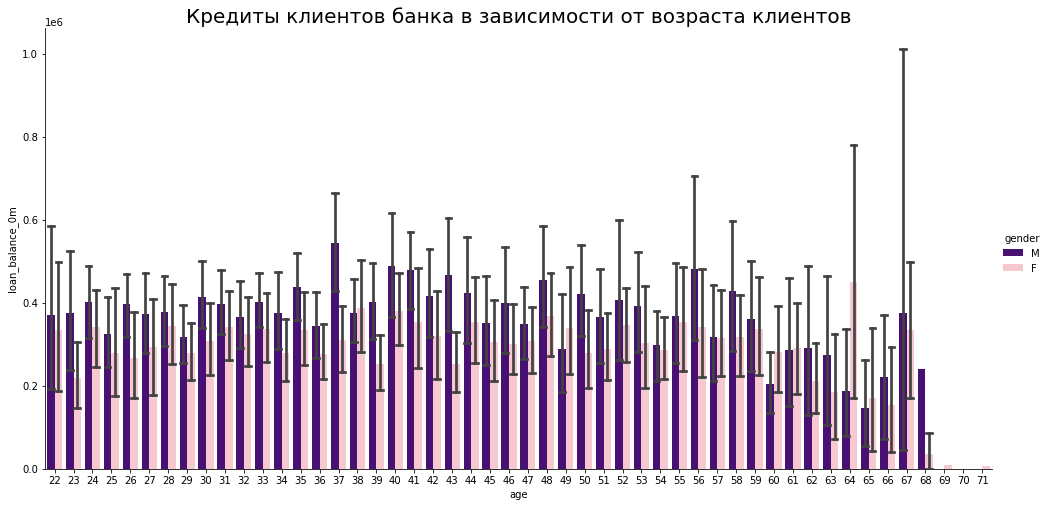

In [16]:
sns.catplot(
    x = 'age', 
    y = 'loan_balance_0m', 
    data = df[df.loan_balance_0m > 0], 
    kind ='bar', 
    hue = 'gender', 
    palette={"М": "indigo", "F": "pink"},
    capsize=0.3, 
    height=7, 
    aspect=2
); 

plt.title('Кредиты клиентов банка в зависимости от возраста клиентов',
          size=20);

Кредитными услугами банка пользуются клиенты в возрасте от 22 до 68 лет, в основном мужчины.

Аномалии наблюдаются для женщин в возрасте 64 и 67, мужчин в возрасте 67

In [17]:
set(df.city_type)

{'100-500', '1M+', '500-1000', '<100', 'Mega'}

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

27.6% of the points cannot be placed; you may want to decrease the size of the markers or use st

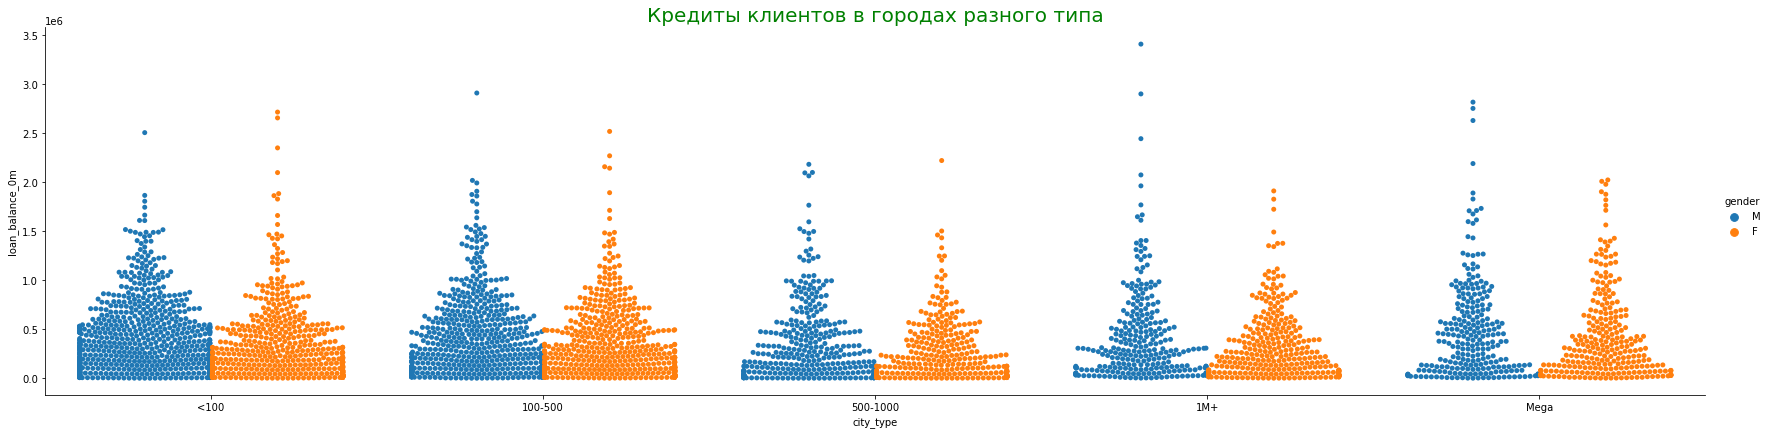

In [18]:
city_order = ['<100', '100-500', '500-1000', '1M+', 'Mega']
sns.catplot(
    x='city_type',
    y='loan_balance_0m', 
    data = df[df.loan_balance_0m > 0], 
    hue = 'gender',    
    order = city_order,
    height=6, 
    aspect=4, 
    kind='swarm', 
    dodge=True)

plt.title('Кредиты клиентов в городах разного типа', size=20, color='g');

Самые высокие и разноплановые по размеру кредиты у клиентов типов городов 1М+ и Mega.

Для городов типа <100 и 100-500 кредиты составляют в среднем до 500000

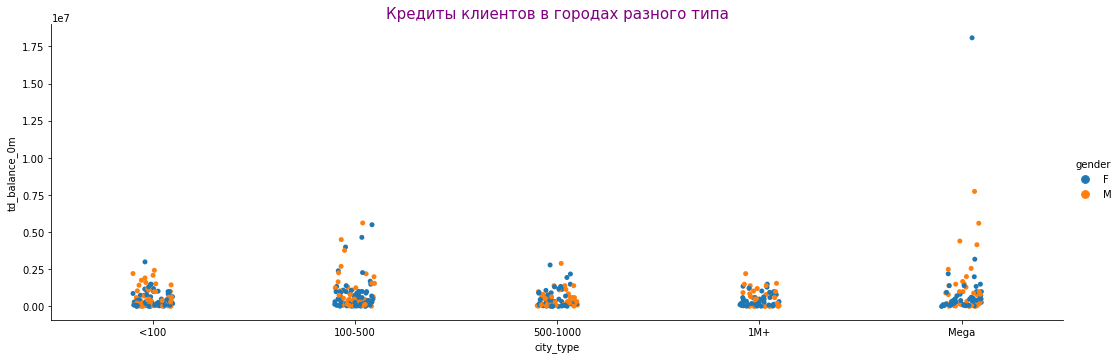

In [19]:
city_order = ['<100', '100-500', '500-1000', '1M+', 'Mega']
sns.catplot(
    x='city_type',
    y='td_balance_0m', 
    data = df[df.td_balance_0m > 0], 
    hue = 'gender',    
    order = city_order,
    height=5, 
    aspect=3, 
    kind='strip', 
    dodge=False)

plt.title('Кредиты клиентов в городах разного типа', size=15, color='purple');

Заметим, что суммы вкладов клиентов ниже сумм кредитов (сравнение с предыдущим графиком) и не зависят от типов городов, в которых проживают клиенты. Наибольшие различия в размерах кредитов среди городов типов 100-500 и Mega. Снова наблюдаем неравномерность в городах типа Mega

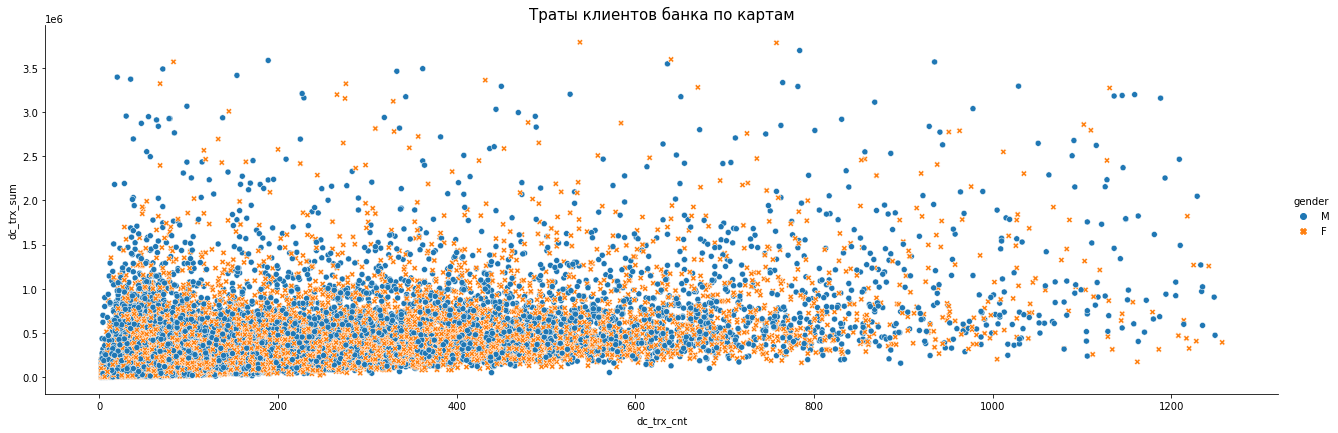

In [20]:
sns.relplot(
    x = 'dc_trx_cnt', 
    y = 'dc_trx_sum', 
    hue = 'gender',
    style = 'gender',
    data = df,
    aspect = 3,
    height= 6)

plt.title('Траты клиентов банка по картам', size=15);

In [21]:
fig = px.scatter(df, 
                 x ='dc_trx_sum', 
                 y ='dc_trx_cnt',
                 facet_row = 'gender',
                 color = 'gender',
                 title ='Количество и сумма трат по картам')

fig.update_layout(xaxis_title = 'Сумма трат по картам',
                  yaxis_title = 'Количество трат по картам')

fig.show()

Женщины совершают большее количество покупок на меньшие суммы по сравнению с мужчинами-клиентами банка.

При достижении отметки суммы покупок выше 3М тренд меняется: женщины за меньшее количество трат по картам достигают наибольших сумм

In [22]:
fig = px.scatter(df, x = 'age', y = 'nbi', color = 'age', 
                 facet_row = 'gender', title = 'Доход банка (nbi) от клиентов разного возраста')
fig.show()

Доходы банка от мужчин выше доходов от женщин, что обусловлено более высокими доходами клиентов-мужчин.

Женщины-клиенты пользуются услугами банка в меньших размерах по сумме, чем мужчины, и достигают пика в возрасте 42-45 лет. Пик доходов от мужчин приходится на возраст от 30 до 60

In [23]:
df_corr = df.loc[:,('age', 'full_mob', 'ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt', 'dc_trx_sum', 'income', 'nbi')]

In [24]:
corr = df_corr.corr()

In [25]:
corr

age  full_mob  ml_balance  cl_balance_0m  \
age              1.000000  0.361302    0.004366       0.004077   
full_mob         0.361302  1.000000    0.045921       0.094032   
ml_balance       0.004366  0.045921    1.000000       0.003765   
cl_balance_0m    0.004077  0.094032    0.003765       1.000000   
loan_balance_0m  0.007082  0.114404    0.262561       0.956557   
td_balance_0m    0.067164  0.052594   -0.002846      -0.018375   
casa_balance_0m  0.062499  0.052555   -0.000792       0.007302   
dc_trx_cnt      -0.121167  0.078372    0.011024       0.098534   
dc_trx_sum       0.115567  0.252139    0.016746       0.197454   
income           0.087545  0.144977    0.047928       0.265395   
nbi              0.058937  0.182766    0.087616       0.766178   

                 loan_balance_0m  td_balance_0m  casa_balance_0m  dc_trx_cnt  \
age                     0.007082       0.067164         0.062499   -0.121167   
full_mob                0.114404       0.052594         0.052555    0.078372   
ml_balance              0.262561      -0.002846        -0.000792    0.011024   
cl_balance_0m           0.956557      -0.018375         0.007302    0.098534   
loan_balance_0m         1.000000      -0.019351         0.004709    0.102188   
td_balance_0m          -0.019351       1.000000         0.121058   -0.008732   
casa_balance_0m         0.004709       0.121058         1.000000    0.090751   
dc_trx_cnt              0.102188      -0.008732         0.090751    1.000000   
dc_trx_sum              0.204467       0.076433         0.272073    0.481656   
income                  0.280413       0.078883         0.302153    0.260194   
nbi                     0.781476       0.122610         0.219462    0.114646   

                 dc_trx_sum    income       nbi  
age                0.115567  0.087545  0.058937  
full_mob           0.252139  0.144977  0.182766  
ml_balance         0.016746  0.047928  0.087616  
cl_balance_0m      0.197454  0.265395  0.766178  
loan_balance_0m    0.204467  0.280413  0.781476  
td_balance_0m      0.076433  0.078883  0.122610  
casa_balance_0m    0.272073  0.302153  0.219462  
dc_trx_cnt         0.481656  0.260194  0.114646  
dc_trx_sum         1.000000  0.621905  0.276583  
income             0.621905  1.000000  0.364350  
nbi                0.276583  0.364350  1.000000

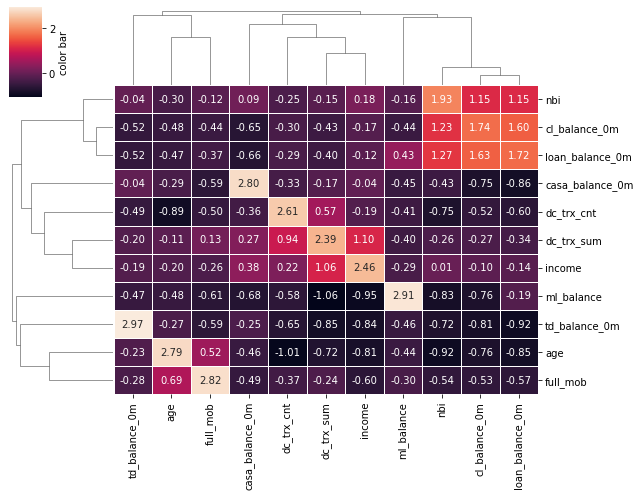

In [31]:
g = sns.clustermap(
    corr, 
    annot = True,
    fmt = '.2f',
    linewidths=.5,
    figsize=(9,7),  
    z_score=1, 
    cbar_kws={"label": "color bar"}
)

In [33]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

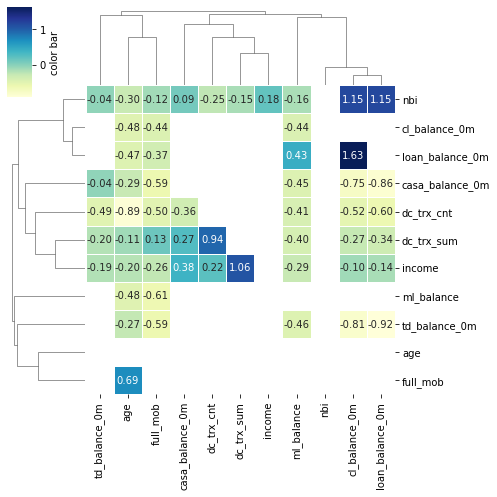

In [34]:
g = sns.clustermap(
    corr, 
    mask = mask, 
    annot = True,
    linewidths=.5,
    fmt = '.2f',
    figsize=(7,7),  
    z_score=1, 
    cmap="YlGnBu",
    cbar_kws={"label": "color bar"}
)


-- Наблюдается сильная положительная зависимость между показателем всех кредитов и потребительским кредитом/ипотекой/доходами банка от клиентов. Это связано с тем, что все кредиты включают в себя показатели ипотеки и потребительского кредита, а доходы банка от клиента включают в себя кредиты клиента в том числе, что объясняет корреляцию с nbi.

-- Положительная корреляция между показателями дохода клиентов и сумм трат по картам подтверждает идею о том, что с ростом доходов растет потребление.

-- Положительная зависимость между возрастом клиентов и длительностью взаимодействия с банком также логично объясняется тем фактом, что чем раньше клиент обратится в банк за услугами, тем дольше будет процесс взаимоотношений.

-- Отрицательная корреляция между показателем депозита клиентов и показателями всех кредитов/потребительских кредитов клиентов означает рациональное поведение клиентов, которые в случае дефицита денежных средств обращаются в банк за кредитом, в случае профицита - оформляют депозит